In [48]:
import os
import pandas as pd
import numpy as np
from haversine import haversine as hs
import missingno

import matplotlib.pyplot as mlp
%matplotlib inline

import seaborn as sns

In [2]:
col_list = ["pk_apt_detail", "supply_extent"]
df_apt_detail = pd.read_csv("./data_/apt_detail.csv", usecols=col_list, sep=';')

In [3]:
df_apt_detail.pk_apt_detail = df_apt_detail.pk_apt_detail.astype(str)
df_apt_detail.supply_extent = df_apt_detail.supply_extent.astype(np.float)

In [4]:
data = {}
for file in os.listdir('./data_'):
    if '.csv' in file and 'apt_detail' not in file:
        fn = file.replace('.csv','')
        data[fn] = pd.read_csv('./data_/'+file)

In [5]:
for key in data.keys():
    print('======= ' + key + ' ======')
    print(data[key].info())
    print('\n')

======= busan_eschool ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연번         305 non-null    int64  
 1   구분         305 non-null    object 
 2   관할지원청      305 non-null    object 
 3   기관명        305 non-null    object 
 4   주소         305 non-null    object 
 5   Latitude   305 non-null    float64
 6   Longitude  305 non-null    float64
 7   전화         305 non-null    object 
 8   홈페이지       305 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 21.6+ KB
None


======= busan_subway ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   역코드         114 non-null    int64  
 1   역명          114 non-null    object 
 2   영문          114 non-null    object 
 3   전화번호        11

- '학교이름','학교경도','학교위도','역이름','역경도','역위도' 데이터 프레임 '환경'생성

In [6]:
data['busan_eschool']['lat_lon'] = list(zip(data['busan_eschool']['Latitude'],data['busan_eschool']['Longitude']))
data['busan_eschool'] = data['busan_eschool'][['기관명', 'lat_lon']]
data['busan_eschool'] = data['busan_eschool'].rename(columns = {'기관명':'학교명'})

In [7]:
data['busan_eschool'].head()

,학교명,lat_lon
0,감정초등학교,"(35.096870200000005, 129.0110047)"
1,감천초등학교,"(35.08309620000001, 129.0076053)"
2,광일초등학교,"(35.10372520000001, 129.02986090000002)"
3,괴정초등학교,"(35.1037635, 128.9998745)"
4,구덕초등학교,"(35.1202619, 129.0123589)"


In [8]:
data['busan_subway']['lat_lon'] = list(zip(data['busan_subway']['Latitude'],data['busan_subway']['Longitude']))
data['busan_subway'] = data['busan_subway'][['역명', 'lat_lon']]

In [9]:
data['busan_subway'].head()

,역명,lat_lon
0,다대포해수욕장역,"(35.074697799999996, 128.97118840000002)"
1,다대포항역,"(35.074697799999996, 128.97118840000002)"
2,낫개역,"(35.074697799999996, 128.97118840000002)"
3,신장림역,"(35.074697799999996, 128.97118840000002)"
4,장림역,"(35.074697799999996, 128.97118840000002)"


- 'apt_master' 데이터 프레임에서 필요한 열만 추출

In [10]:
data['apt_master']['lat_lon'] = list(zip(data['apt_master']['lat'],data['apt_master']['lon']))
data['apt_master'] = data['apt_master'][['pk_apt_master','total_house_cnt','total_dong_cnt','max_jisang_floor','min_jisang_floor','total_jucha_rate','heat_method','lat_lon','bldg_cd','gen_dt']]
data['apt_master'].head()

,pk_apt_master,total_house_cnt,total_dong_cnt,max_jisang_floor,min_jisang_floor,total_jucha_rate,heat_method,lat_lon,bldg_cd,gen_dt
0,24,450,3,20,1.0,1.04,개별난방,"(35.160214286423155, 129.02247008783408)",1,1992.12
1,45,788,13,25,18.0,1.06,지역난방,"(35.17814223752016, 129.18080133654178)",1,1998.11
2,49,938,12,25,8.0,1.00,지역난방,"(35.17511010074104, 129.17683514653672)",1,1997.09
3,59,655,11,24,16.0,1.00,지역난방,"(35.177678699197266, 129.16727161464672)",1,1997.05
4,69,1358,19,24,19.0,1.13,지역난방,"(35.16660212799623, 129.18570786561207)",1,1996.11


In [11]:
def min_eschool(lat_lon):
    m = np.inf
    nm = ''
    n = len(data['busan_eschool'])
    for i in range(n):
        d = hs(lat_lon, data['busan_eschool'].iloc[i,1])
        if d < m:
            m = d
            nm = data['busan_eschool'].iloc[i,0]
    return nm, d 

In [12]:
%time data['apt_master']['min_eschool'] = data['apt_master']['lat_lon'].apply(min_eschool)

CPU times: user 10.5 s, sys: 51.8 ms, total: 10.5 s
Wall time: 11 s


In [13]:
def min_subway(lat_lon):
    m = np.inf
    nm = ''
    n = len(data['busan_subway'])
    for i in range(n):
        d = hs(lat_lon, data['busan_subway'].iloc[i,1])
        if d < m:
            m = d
            nm = data['busan_subway'].iloc[i,0]
    return nm, d 

In [14]:
%time data['apt_master']['min_subway'] = data['apt_master']['lat_lon'].apply(min_subway)

CPU times: user 4.08 s, sys: 19 ms, total: 4.1 s
Wall time: 4.22 s


In [15]:
data['apt_master'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pk_apt_master     2770 non-null   int64  
 1   total_house_cnt   2770 non-null   int64  
 2   total_dong_cnt    2770 non-null   int64  
 3   max_jisang_floor  2770 non-null   int64  
 4   min_jisang_floor  2624 non-null   float64
 5   total_jucha_rate  2769 non-null   float64
 6   heat_method       2614 non-null   object 
 7   lat_lon           2770 non-null   object 
 8   bldg_cd           2770 non-null   int64  
 9   gen_dt            2770 non-null   float64
 10  min_eschool       2770 non-null   object 
 11  min_subway        2770 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 259.8+ KB


In [16]:
data['apt_master'] = pd.merge(data['apt_master'], 
              pd.DataFrame(data['apt_master']['min_eschool'].tolist(), 
                           columns=['nm_sch','dist_sch'],
                           index = data['apt_master'].index),
              left_index=True, 
              right_index=True,
              how='left')
data['apt_master'] = pd.merge(data['apt_master'], 
              pd.DataFrame(data['apt_master']['min_subway'].tolist(), 
                           columns=['nm_sub','dist_sub'],
                           index = data['apt_master'].index),
              left_index=True, 
              right_index=True,
              how='left')

In [17]:
data['apt_master'] = data['apt_master'][['pk_apt_master', 'total_house_cnt', 'total_dong_cnt', 'max_jisang_floor', 
                                         'min_jisang_floor', 'total_jucha_rate', 'heat_method','bldg_cd', 'gen_dt',
                                         'nm_sch', 'dist_sch', 'nm_sub', 'dist_sub']]

In [18]:
data['apt_master'].head()

,pk_apt_master,total_house_cnt,total_dong_cnt,max_jisang_floor,min_jisang_floor,total_jucha_rate,heat_method,bldg_cd,gen_dt,nm_sch,dist_sch,nm_sub,dist_sub
0,24,450,3,20,1.0,1.04,개별난방,1,1992.12,개화초등학교,7.662802,동의대,16.087784
1,45,788,13,25,18.0,1.06,지역난방,1,1998.11,부흥초등학교,7.092371,장산,6.653143
2,49,938,12,25,8.0,1.00,지역난방,1,1997.09,부흥초등학교,6.647549,장산,6.956514
3,59,655,11,24,16.0,1.00,지역난방,1,1997.05,양운초등학교,5.918199,장산,6.672089
4,69,1358,19,24,19.0,1.13,지역난방,1,1996.11,좌산초등학교,7.241903,중동,7.985490


- 'apt_trade'를 원하는 피쳐만 모으자

In [19]:
data['apt_trade'] = data['apt_trade'][['pk_apt_trade','pk_apt_master','sigungu_cd','dong_cd','deal_ymd','private_extent','price','floor','pk_apt_detail']]

- 'apt_trade'에 'pk_apt_master'키를 기준으로 'apt_master'정보를 합치자

In [20]:
data['apt_trade'] = pd.merge(data['apt_trade'],data['apt_master'],
                             how='left',on='pk_apt_master')

In [21]:
data['apt_trade'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248503 entries, 0 to 248502
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pk_apt_trade      248503 non-null  int64  
 1   pk_apt_master     248503 non-null  int64  
 2   sigungu_cd        248503 non-null  int64  
 3   dong_cd           248503 non-null  int64  
 4   deal_ymd          248503 non-null  int64  
 5   private_extent    248503 non-null  float64
 6   price             248503 non-null  int64  
 7   floor             248503 non-null  int64  
 8   pk_apt_detail     248503 non-null  int64  
 9   total_house_cnt   248503 non-null  int64  
 10  total_dong_cnt    248503 non-null  int64  
 11  max_jisang_floor  248503 non-null  int64  
 12  min_jisang_floor  247717 non-null  float64
 13  total_jucha_rate  248493 non-null  float64
 14  heat_method       246297 non-null  object 
 15  bldg_cd           248503 non-null  int64  
 16  gen_dt            24

In [22]:
for col in data['apt_trade'].columns:
    if sum(data['apt_trade'][col].isnull()):
        print(str(col) +'열의 %.1f%% 데이터가 null\n' % ( (sum(data['apt_trade'][col].isnull())/len(data['apt_trade'][col]))*100 ))

min_jisang_floor열의 0.3% 데이터가 null

total_jucha_rate열의 0.0% 데이터가 null

heat_method열의 0.9% 데이터가 null



- null 데이터가 있으면 삭제하자

In [23]:
data['apt_trade'] = data['apt_trade'].dropna()

In [24]:
for col in data['apt_trade'].columns:
    if sum(data['apt_trade'][col].isnull()):
        print(str(col) +'열의 %.1f%% 데이터가 null\n' % ( (sum(data['apt_trade'][col].isnull())/len(data['apt_trade'][col]))*100 ))

In [25]:
data['apt_trade'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246111 entries, 0 to 248502
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pk_apt_trade      246111 non-null  int64  
 1   pk_apt_master     246111 non-null  int64  
 2   sigungu_cd        246111 non-null  int64  
 3   dong_cd           246111 non-null  int64  
 4   deal_ymd          246111 non-null  int64  
 5   private_extent    246111 non-null  float64
 6   price             246111 non-null  int64  
 7   floor             246111 non-null  int64  
 8   pk_apt_detail     246111 non-null  int64  
 9   total_house_cnt   246111 non-null  int64  
 10  total_dong_cnt    246111 non-null  int64  
 11  max_jisang_floor  246111 non-null  int64  
 12  min_jisang_floor  246111 non-null  float64
 13  total_jucha_rate  246111 non-null  float64
 14  heat_method       246111 non-null  object 
 15  bldg_cd           246111 non-null  int64  
 16  gen_dt            24

- 데이터 타입을 정제하자

In [26]:
data['apt_trade'].pk_apt_trade = data['apt_trade'].pk_apt_trade.astype(str)
data['apt_trade'].pk_apt_master = data['apt_trade'].pk_apt_master.astype(str)
data['apt_trade'].sigungu_cd = data['apt_trade'].sigungu_cd.astype(str)
data['apt_trade'].dong_cd = data['apt_trade'].dong_cd.astype(str)
data['apt_trade'].floor = data['apt_trade'].floor.astype(str)
data['apt_trade'].pk_apt_detail = data['apt_trade'].pk_apt_detail.astype(str)
data['apt_trade'].bldg_cd = data['apt_trade'].bldg_cd.astype(str)

In [27]:
data['apt_trade']['price'] = data['apt_trade']['price'].astype(np.float)
data['apt_trade']['min_jisang_floor'] = data['apt_trade']['min_jisang_floor'].astype(np.int)

data['apt_trade'].gen_dt = data['apt_trade'].gen_dt.astype(str).str.replace('.','').astype(np.int)

In [28]:
data['apt_trade'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246111 entries, 0 to 248502
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pk_apt_trade      246111 non-null  object 
 1   pk_apt_master     246111 non-null  object 
 2   sigungu_cd        246111 non-null  object 
 3   dong_cd           246111 non-null  object 
 4   deal_ymd          246111 non-null  int64  
 5   private_extent    246111 non-null  float64
 6   price             246111 non-null  float64
 7   floor             246111 non-null  object 
 8   pk_apt_detail     246111 non-null  object 
 9   total_house_cnt   246111 non-null  int64  
 10  total_dong_cnt    246111 non-null  int64  
 11  max_jisang_floor  246111 non-null  int64  
 12  min_jisang_floor  246111 non-null  int64  
 13  total_jucha_rate  246111 non-null  float64
 14  heat_method       246111 non-null  object 
 15  bldg_cd           246111 non-null  object 
 16  gen_dt            24

In [29]:
data['apt_trade'].to_csv('apt_trade_pre.csv', index=False)

- 여기서부터 정리된 데이터를 **df**로 부르자
- 각 피쳐의 값 갯수를 확인하자

In [30]:
# df = pd.read_csv('apt_trade_pre.csv')
df = data['apt_trade'].copy()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246111 entries, 0 to 248502
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pk_apt_trade      246111 non-null  object 
 1   pk_apt_master     246111 non-null  object 
 2   sigungu_cd        246111 non-null  object 
 3   dong_cd           246111 non-null  object 
 4   deal_ymd          246111 non-null  int64  
 5   private_extent    246111 non-null  float64
 6   price             246111 non-null  float64
 7   floor             246111 non-null  object 
 8   pk_apt_detail     246111 non-null  object 
 9   total_house_cnt   246111 non-null  int64  
 10  total_dong_cnt    246111 non-null  int64  
 11  max_jisang_floor  246111 non-null  int64  
 12  min_jisang_floor  246111 non-null  int64  
 13  total_jucha_rate  246111 non-null  float64
 14  heat_method       246111 non-null  object 
 15  bldg_cd           246111 non-null  object 
 16  gen_dt            24

In [32]:
for col in df.columns:
    print('======== ' + col + ' ========')
    print(len(df[col].unique()))

======== pk_apt_trade ========
246111
======== pk_apt_master ========
2047
======== sigungu_cd ========
16
======== dong_cd ========
43
======== deal_ymd ========
77
======== private_extent ========
4059
======== price ========
6275
======== floor ========
82
======== pk_apt_detail ========
6019
======== total_house_cnt ========
739
======== total_dong_cnt ========
35
======== max_jisang_floor ========
55
======== min_jisang_floor ========
44
======== total_jucha_rate ========
203
======== heat_method ========
3
======== bldg_cd ========
2
======== gen_dt ========
509
======== nm_sch ========
275
======== dist_sch ========
2047
======== nm_sub ========
62
======== dist_sub ========
2047


In [33]:
df.columns

Index(['pk_apt_trade', 'pk_apt_master', 'sigungu_cd', 'dong_cd', 'deal_ymd',
       'private_extent', 'price', 'floor', 'pk_apt_detail', 'total_house_cnt',
       'total_dong_cnt', 'max_jisang_floor', 'min_jisang_floor',
       'total_jucha_rate', 'heat_method', 'bldg_cd', 'gen_dt', 'nm_sch',
       'dist_sch', 'nm_sub', 'dist_sub'],
      dtype='object')

In [34]:
df_sp = pd.merge(df, df_apt_detail, on='pk_apt_detail', how='left')

<AxesSubplot:>

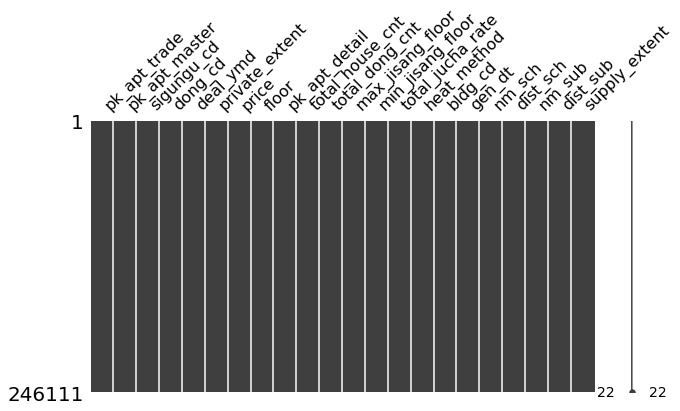

In [35]:
missingno.matrix(df_sp, figsize=(10,5))

In [36]:
df_sp['pr/se'] = df_sp['price']/df_sp['supply_extent']

In [37]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246111 entries, 0 to 246110
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pk_apt_trade      246111 non-null  object 
 1   pk_apt_master     246111 non-null  object 
 2   sigungu_cd        246111 non-null  object 
 3   dong_cd           246111 non-null  object 
 4   deal_ymd          246111 non-null  int64  
 5   private_extent    246111 non-null  float64
 6   price             246111 non-null  float64
 7   floor             246111 non-null  object 
 8   pk_apt_detail     246111 non-null  object 
 9   total_house_cnt   246111 non-null  int64  
 10  total_dong_cnt    246111 non-null  int64  
 11  max_jisang_floor  246111 non-null  int64  
 12  min_jisang_floor  246111 non-null  int64  
 13  total_jucha_rate  246111 non-null  float64
 14  heat_method       246111 non-null  object 
 15  bldg_cd           246111 non-null  object 
 16  gen_dt            24

In [40]:
df_sp['floor'] = df_sp['floor'].astype(np.int8)
df_sp['heat_method'] = df_sp['heat_method'].factorize()[0]
df_sp['nm_sch'] = df_sp['nm_sch'].factorize()[0]
df_sp['nm_sub'] = df_sp['nm_sub'].factorize()[0] 

In [41]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246111 entries, 0 to 246110
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pk_apt_trade      246111 non-null  object 
 1   pk_apt_master     246111 non-null  object 
 2   sigungu_cd        246111 non-null  object 
 3   dong_cd           246111 non-null  object 
 4   deal_ymd          246111 non-null  int64  
 5   private_extent    246111 non-null  float64
 6   price             246111 non-null  float64
 7   floor             246111 non-null  int8   
 8   pk_apt_detail     246111 non-null  object 
 9   total_house_cnt   246111 non-null  int64  
 10  total_dong_cnt    246111 non-null  int64  
 11  max_jisang_floor  246111 non-null  int64  
 12  min_jisang_floor  246111 non-null  int64  
 13  total_jucha_rate  246111 non-null  float64
 14  heat_method       246111 non-null  int64  
 15  bldg_cd           246111 non-null  object 
 16  gen_dt            24

In [42]:
%time df_sp.to_csv('apt_trade_0721.csv', index=False)

CPU times: user 3.83 s, sys: 107 ms, total: 3.93 s
Wall time: 4.3 s


In [43]:
df_sp.shape

(246111, 23)

In [46]:
df_sp.describe(include='all')

,pk_apt_trade,pk_apt_master,sigungu_cd,dong_cd,deal_ymd,private_extent,price,floor,pk_apt_detail,total_house_cnt,...,total_jucha_rate,heat_method,bldg_cd,gen_dt,nm_sch,dist_sch,nm_sub,dist_sub,supply_extent,pr/se
count,246111,246111,246111,246111,246111.000000,246111.000000,246111.000000,246111.000000,246111,246111.000000,...,246111.000000,246111.000000,246111,246111.000000,246111.000000,246111.000000,246111.000000,246111.000000,246111.000000,246111.000000
unique,246111,2047,16,43,NaN,NaN,NaN,NaN,6019,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7116148,58418,26350,10200,NaN,NaN,NaN,NaN,18778,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3301,41325,32026,NaN,NaN,NaN,NaN,1426,NaN,...,NaN,NaN,245963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,201632.260809,78.864542,27227.539915,10.937496,NaN,1039.338339,...,0.977350,0.250529,NaN,181380.342337,134.796706,8.423263,31.723673,13.568693,98.364031,266.635233
std,NaN,NaN,NaN,NaN,179.843840,29.828629,16945.192133,7.894998,NaN,1119.658672,...,0.512759,0.620119,NaN,54828.826845,69.082680,4.979602,15.910237,6.248696,35.664733,96.586217
min,NaN,NaN,NaN,NaN,201401.000000,14.290000,729.000000,-1.000000,NaN,20.000000,...,0.000000,0.000000,NaN,19761.000000,0.000000,0.265642,0.000000,0.110245,17.182900,6.290095
25%,NaN,NaN,NaN,NaN,201504.000000,59.805100,16243.500000,5.000000,NaN,380.000000,...,0.700000,0.000000,NaN,199108.000000,79.000000,4.371812,17.000000,8.445678,74.869000,199.766979
50%,NaN,NaN,NaN,NaN,201607.000000,82.470000,23700.000000,10.000000,NaN,722.000000,...,1.010000,0.000000,NaN,199806.000000,139.000000,7.043034,32.000000,13.110087,96.452000,250.708700
75%,NaN,NaN,NaN,NaN,201801.000000,84.981700,33900.000000,15.000000,NaN,1280.000000,...,1.210000,0.000000,NaN,200607.000000,191.000000,11.605966,44.000000,16.201917,111.724500,312.768967


<AxesSubplot:xlabel='pr/se'>

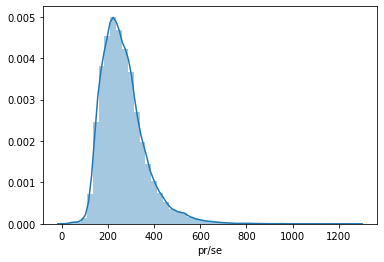

In [49]:
sns.distplot(df_sp['pr/se'])

%time df_onehot = pd.get_dummies(df, columns = ['sigungu_cd', 'dong_cd', 'floor', 'heat_method', 'bldg_cd', 'gen_dt', 'nm_sch', 'nm_sub'])